In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import os
import cv2 as cv
import torch.nn as nn
from PIL import Image

from torch.utils.data import Dataset, DataLoader, ConcatDataset, random_split
import torchvision.transforms as transforms
import torchvision.models as models
from torch import optim
import json
import torch.optim.lr_scheduler as lr_scheduler

from tqdm import tqdm
from utils import util_functions, metric_functions, custom_dataset

In [2]:
train_labels_path = 'dataset\\train.csv'
test_labels_path = 'dataset\\test.csv'
train_images_dir = 'dataset\\train'
test_images_dir = 'dataset\\test'

train_labels_df = pd.read_csv(train_labels_path)
test_labels_df = pd.read_csv(test_labels_path)

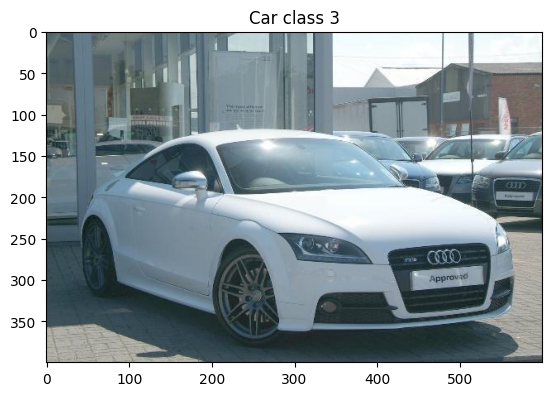

In [3]:
# visualizing one of the cars
util_functions.visualize_image(os.path.join('dataset', train_labels_df.iloc[0, 0]), train_labels_df.iloc[0, 1])

In [4]:
## Checking data
train_labels_df.head(2)

,id,label
0,train/1.jpg,3
1,train/2.jpg,80


In [5]:
## Checking how many different classes we have
no_classes = len(list(train_labels_df['label'].unique()))
print(no_classes)

100


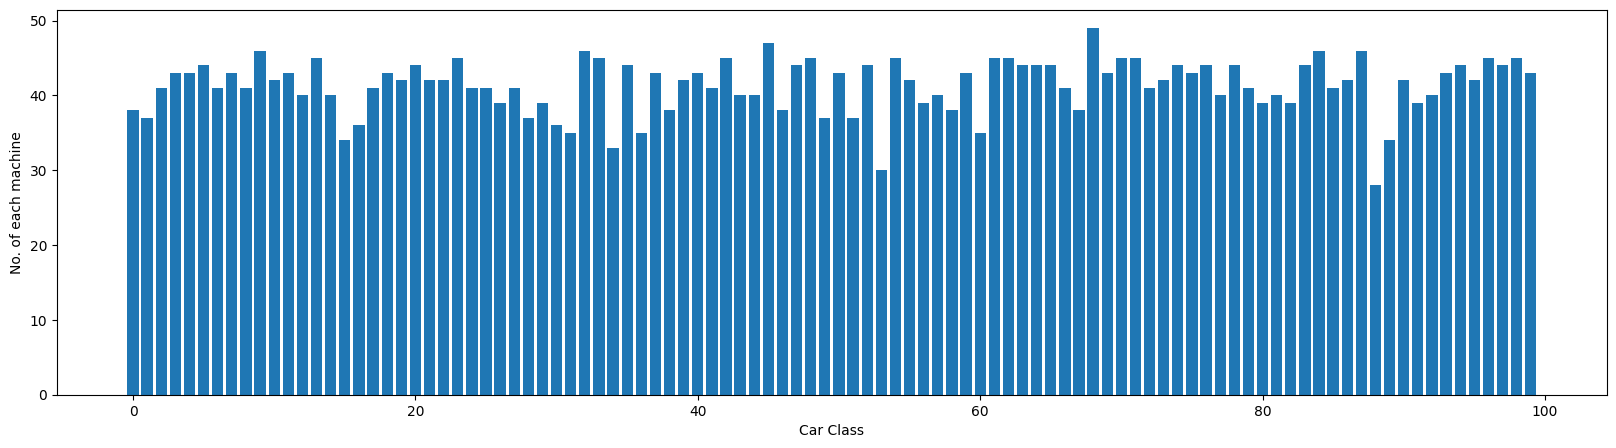

Min: 28, Max: 49
label
0     38
1     37
2     41
3     43
4     43
      ..
95    42
96    45
97    44
98    45
99    43
Name: count, Length: 100, dtype: int64


In [6]:
util_functions.check_no_of_each_class(train_labels_df)

In [20]:
dataset = custom_dataset.CustomDataset(images_dir=train_images_dir, df=train_labels_df, transforms=None)
len(dataset)

4135

In [21]:
# Define the sizes for the training and validation sets
train_size = int(0.8 * len(dataset))  # 80% of the data for training
val_size = len(dataset) - train_size   # Remaining 20% for validation

# Use random_split to create training and validation sets
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
print(len(train_dataset), len(val_dataset))

3308 827


In [22]:
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [8]:
# load pretrained dataset
model = models.resnet50(pretrained=True)
# changing the last layer to our cause
model.fc = nn.Linear(model.fc.in_features, no_classes)
model

c:\Users\sinaz\.conda\envs\test\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sinaz\.conda\envs\test\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 